In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Results from SA runs

In [11]:
# metric is neg_mean_squared_error

d =np.load('cv_scores_gpr.npz')
cv_scores_gpr = -d['cv_scores_gpr']

d =np.load('cv_scores_mgpr.npz')
cv_scores_mgpr = -d['cv_scores_mgpr']

d =np.load('cv_scores_rf.npz')
cv_scores_rf = -d['cv_scores_rf']

d =np.load('cv_scores_svm.npz')
cv_scores_svm = -d['cv_scores_svm']

d =np.load('cv_scores_mlp.npz')
cv_scores_mlp = -d['cv_scores_mlp']

print(np.nanmedian(cv_scores_gpr))
print(np.nanmedian(cv_scores_mgpr))
print(np.nanmedian(cv_scores_rf))
print(np.nanmedian(cv_scores_svm))
print(np.nanmedian(cv_scores_mlp))

0.01624242559483701
0.016318170745503062
0.019089845597731185
0.021040536152097413
0.06473865952796412


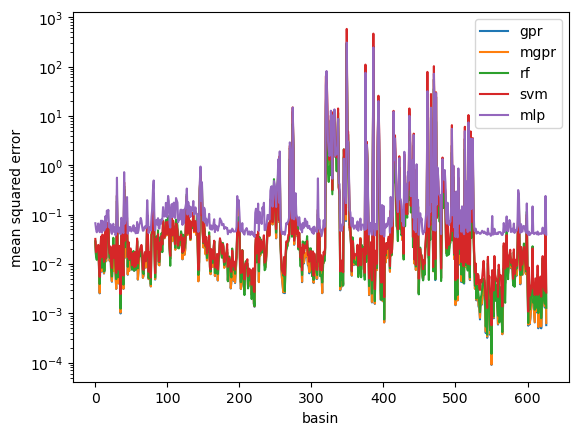

In [14]:
plt.plot(cv_scores_gpr, label='gpr')
plt.plot(cv_scores_mgpr, label='mgpr')
plt.plot(cv_scores_rf, label='rf')
plt.plot(cv_scores_svm, label='svm')
plt.plot(cv_scores_mlp, label='mlp')
plt.yscale('log')
plt.ylabel('mean squared error')
plt.xlabel('basin')
plt.legend()
# plt.show()
plt.savefig("method_compare_from_SAruns.png",dpi=600,bbox_inches='tight')

# Results from iteration-0

In [47]:
dtmp = np.load('CAMELS_4model_emulator_metric.npz')
metric_out = dtmp['metric_out'] 
methods=np.array(['RF','GPR','SVM','ANN'])


metric_out = metric_out[:, [1,0,2,3]]
methods = methods[[1,0,2,3]]

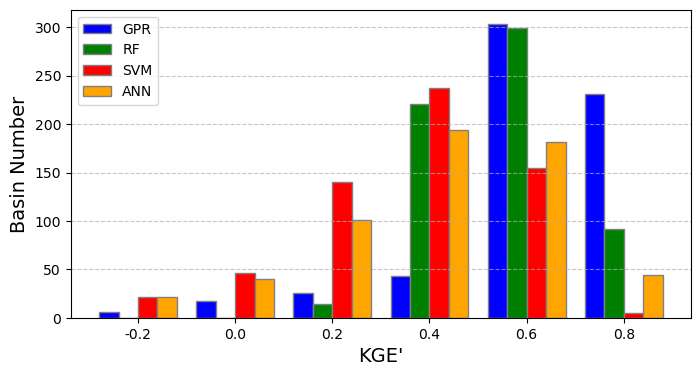

In [50]:

bins = np.arange(-0.2, 1.2, 0.2)

# Calculate the histogram for each method
counts = [np.histogram(metric_out[:, i], bins=bins)[0] for i in range(metric_out.shape[1])]

# Number of bins
n_bins = len(bins) - 1

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(n_bins)-bar_width/2
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(8, 4))

# Create the bar plots
plt.bar(r1, counts[0], color='blue', width=bar_width, edgecolor='grey', label=methods[0])
plt.bar(r2, counts[1], color='green', width=bar_width, edgecolor='grey', label=methods[1])
plt.bar(r3, counts[2], color='red', width=bar_width, edgecolor='grey', label=methods[2])
plt.bar(r4, counts[3], color='orange', width=bar_width, edgecolor='grey', label=methods[3])

# Adding xticks
plt.xlabel("KGE'", fontsize=14)
plt.ylabel("Basin Number", fontsize=14)
plt.xticks([r + bar_width for r in range(n_bins)], [f'{bins[i]:.1f}' for i in range(n_bins)])
plt.legend()

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Saving the plot with high resolution
plt.savefig("fourmethod_hist_from_Iter0runs.png",dpi=600,bbox_inches='tight')

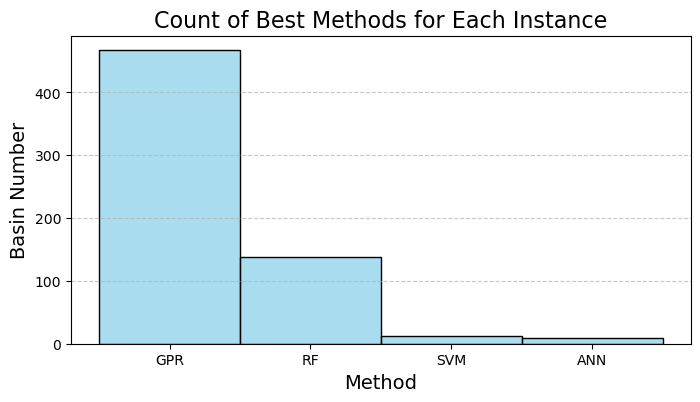

In [60]:
# Calculate which method has the maximum value for each instance
best_methods = np.argmax(metric_out, axis=1)

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot histogram using seaborn for better aesthetics
sns.histplot(best_methods, bins=np.arange(5)-0.5, kde=False, edgecolor='black', color='skyblue', alpha=0.7)

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Setting labels with larger font sizes
plt.xlabel("Method", fontsize=14)
plt.ylabel("Basin Number", fontsize=14)

# Adding a title
plt.title("Count of Best Methods for Each Instance", fontsize=16)

# Setting xticks to the method names
plt.xticks(ticks=np.arange(4), labels=methods)

# Saving the plot with high resolution
plt.savefig("bestmethod_count_from_Iter0runs.png", dpi=600, bbox_inches='tight')

# Display the plot
plt.show()